In [97]:
#import packages
import pandas as pd
import geopandas as gpd
import requests
from shapely.geometry import shape, Point
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import urllib.request, json
import requests
import urllib.parse
import datetime
import os

import warnings
warnings.filterwarnings('ignore')

### NYC Open Data:
    
Subway and Bus Stops SODA API Urls:

* Subway: `https://data.cityofnewyork.us/resource/kk4q-3rt2.json`
* Bus: `https://data.cityofnewyork.us/resource/t4f2-8md7.json`

Supporting Shapefiles:

* U.S. Census Tracts 2020: `https://data.cityofnewyork.us/resource/63ge-mke6.json`

In [2]:
subwayurl =  'https://data.cityofnewyork.us/resource/kk4q-3rt2.json'
busurl = 'https://data.cityofnewyork.us/resource/t4f2-8md7.json'

query = (subwayurl+'?'
        "$select=*"
        "&$limit=10000")
query = query.replace(" ", "%20")
response = urllib.request.urlopen(query)
data = json.loads(response.read())

for d in data:
    d['geometry'] = shape(d['the_geom'])

#store in a geodataframe
subway_gdf = gpd.GeoDataFrame(data, geometry = 'geometry', crs = 'EPSG: 4326')
subway_gdf = subway_gdf.drop(columns = ['the_geom'])
subway_gdf.head()

,url,objectid,name,line,notes,geometry
0,http://web.mta.info/nyct/service/,1,Astor Pl,4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (-73.99107 40.73005)
1,http://web.mta.info/nyct/service/,2,Canal St,4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (-74.00019 40.71880)
2,http://web.mta.info/nyct/service/,3,50th St,1-2,"1-all times, 2-nights",POINT (-73.98385 40.76173)
3,http://web.mta.info/nyct/service/,4,Bergen St,2-3-4,"4-nights, 3-all other times, 2-all times",POINT (-73.97500 40.68086)
4,http://web.mta.info/nyct/service/,5,Pennsylvania Ave,3-4,"4-nights, 3-all other times",POINT (-73.89489 40.66471)


In [3]:
query = (busurl+'?'
        "$select=*"
        "&$limit=10000")
query = query.replace(" ", "%20")
response = urllib.request.urlopen(query)
data = json.loads(response.read())

for d in data:
    d['geometry'] = shape(d['the_geom'])

#store in a geodataframe
bus_gdf = gpd.GeoDataFrame(data, geometry = 'geometry', crs = 'EPSG: 4326')
bus_gdf = bus_gdf.drop(columns = ['the_geom'])
bus_gdf = bus_gdf[bus_gdf['boro_name']!='Staten Island']
bus_gdf.head()

,boro_code,boro_name,boro_cd,coun_dist,assem_dist,st_sen_dist,cong_dist,shelter_id,corner,on_street,cross_stre,longitude,latitude,ntaname,femafldz,femafld_t,hrc_evac,geometry
0,3,Brooklyn,317,45,42,21,9,BR02218,SW,AV D,NOSTRAND AV,-73.948745,40.640863,East Flatbush-Erasmus,X,AREA OF MINIMAL FLOOD HAZARD,5,POINT (-73.94874 40.64085)
1,3,Brooklyn,310,43,46,26,11,BR02219,SW,5 AV,BAY RIDGE PKWY,-74.022837,40.629253,Bay Ridge,X,AREA OF MINIMAL FLOOD HAZARD,NaN,POINT (-74.02284 40.62924)
2,3,Brooklyn,308,41,55,20,9,BR02220,SE,ST MARKS AV,BUFFALO AV,-73.924674,40.673767,Crown Heights (North),X,AREA OF MINIMAL FLOOD HAZARD,NaN,POINT (-73.92467 40.67376)
3,3,Brooklyn,315,48,45,23,8,BR02221,SW,ORIENTAL BLVD,MACKENZIE ST,-73.940136,40.578042,Sheepshead Bay-Manhattan Beach-Gerritsen Beach,X,AREA OF MINIMAL FLOOD HAZARD,1,POINT (-73.94013 40.57803)
4,3,Brooklyn,315,48,45,23,8,BR02222,SW,ORIENTAL BLVD,MACKENZIE ST,-73.939918,40.578065,Sheepshead Bay-Manhattan Beach-Gerritsen Beach,X,AREA OF MINIMAL FLOOD HAZARD,1,POINT (-73.93992 40.57806)


In [4]:
len(bus_gdf)

3122

In [5]:
len(subway_gdf)

473

In [6]:
#save raw points data into shapefile
bus_gdf.to_file('../Data/bus_stop_shelter.shp')
subway_gdf.to_file('../Data/subway_stations.shp')

In [60]:
#import tracts 2010
#tractsurl_2020 = 'https://data.cityofnewyork.us/resource/63ge-mke6.json'
tractsurl = 'https://data.cityofnewyork.us/resource/i69b-3rdj.json'
query = (tractsurl+'?'
        "$select=*"
        "&$limit=10000")
query = query.replace(" ", "%20")
response = urllib.request.urlopen(query)
data = json.loads(response.read())

for d in data:
    d['geometry'] = shape(d['the_geom'])

#store in a geodataframe
tracts_gdf = gpd.GeoDataFrame(data, geometry = 'geometry', crs = 'EPSG: 4326')
tracts_gdf = tracts_gdf.drop(columns = ['the_geom'])
tracts_gdf = tracts_gdf[tracts_gdf['boro_name']!='Staten Island']

# Define the mapping dictionary
boro_fips = {'Bronx': 36005, 'Brooklyn': 36047, 'Manhattan': 36061, 'Queens': 36081}

# Create a new column 'geoid' by concatenating 'FIPSCode' and 'ct2010'
tracts_gdf['geoid'] = tracts_gdf.apply(lambda row: str(boro_fips[row['boro_name']]) + row['ct2010'], axis=1)

tracts_gdf.head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct2010,cdeligibil,ntacode,ntaname,puma,shape_leng,shape_area,geometry,geoid
1,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,1906016.47074,"MULTIPOLYGON (((-73.96433 40.75638, -73.96479 ...",36061009800
2,102,1,Manhattan,010200,1010200,I,MN17,Midtown-Midtown South,3807,5687.80243891,1860992.68163,"MULTIPOLYGON (((-73.97124 40.76094, -73.97170 ...",36061010200
3,104,1,Manhattan,010400,1010400,I,MN17,Midtown-Midtown South,3807,5693.03636707,1864600.43538,"MULTIPOLYGON (((-73.97446 40.76229, -73.97491 ...",36061010400
4,113,1,Manhattan,011300,1011300,I,MN17,Midtown-Midtown South,3807,5699.86064037,1890907.25105,"MULTIPOLYGON (((-73.98412 40.75484, -73.98460 ...",36061011300
5,130,1,Manhattan,013000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,5807.97295649,1918144.56374,"MULTIPOLYGON (((-73.96148 40.77432, -73.96194 ...",36061013000


In [99]:
tracts_gdf['centroid'] = tracts_gdf.to_crs('+proj=cea').centroid.to_crs(4326)
tracts_gdf['Center_Lat'] = tracts_gdf['centroid'].y
tracts_gdf['Center_Lon'] = tracts_gdf['centroid'].x
tracts_gdf = tracts_gdf.drop(columns = 'centroid')
tracts_gdf = tracts_gdf.to_crs(32118)
tracts_gdf['area_km2'] = tracts_gdf.geometry.area / 1e6
tracts_gdf = tracts_gdf.to_crs(4326)
tracts_gdf.head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct2010,cdeligibil,ntacode,ntaname,puma,shape_leng,shape_area,geometry,geoid,Center_Lat,Center_Lon,area_km2
1,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,1906016.47074,"MULTIPOLYGON (((-73.96433 40.75638, -73.96479 ...",36061009800,40.755788,-73.967775,0.177075
2,102,1,Manhattan,010200,1010200,I,MN17,Midtown-Midtown South,3807,5687.80243891,1860992.68163,"MULTIPOLYGON (((-73.97124 40.76094, -73.97170 ...",36061010200,40.759424,-73.974449,0.172893
3,104,1,Manhattan,010400,1010400,I,MN17,Midtown-Midtown South,3807,5693.03636707,1864600.43538,"MULTIPOLYGON (((-73.97446 40.76229, -73.97491 ...",36061010400,40.760779,-73.977673,0.173228
4,113,1,Manhattan,011300,1011300,I,MN17,Midtown-Midtown South,3807,5699.86064037,1890907.25105,"MULTIPOLYGON (((-73.98412 40.75484, -73.98460 ...",36061011300,40.754775,-73.987870,0.175672
5,130,1,Manhattan,013000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,5807.97295649,1918144.56374,"MULTIPOLYGON (((-73.96148 40.77432, -73.96194 ...",36061013000,40.772736,-73.964734,0.178202


In [100]:
tracts_gdf.dtypes

ctlabel          object
boro_code        object
boro_name        object
ct2010           object
boro_ct2010      object
cdeligibil       object
ntacode          object
ntaname          object
puma             object
shape_leng       object
shape_area       object
geometry       geometry
geoid            object
Center_Lat      float64
Center_Lon      float64
area_km2        float64
dtype: object

In [101]:
len(tracts_gdf)

2055

In [102]:
tracts_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [103]:
# Define the name and path of the folder you want to create
folder_name = "2010_Census_Tracts"
folder_path = "../Data/" + folder_name

# Check if the folder already exists and create it if it doesn't
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Define the name and path of the shapefile you want to save
shapefile_name = "2010_Census_Tracts.shp"
shapefile_path = folder_path + "/" + shapefile_name

# Save the geodataframe to the shapefile
tracts_gdf.to_file(shapefile_path)

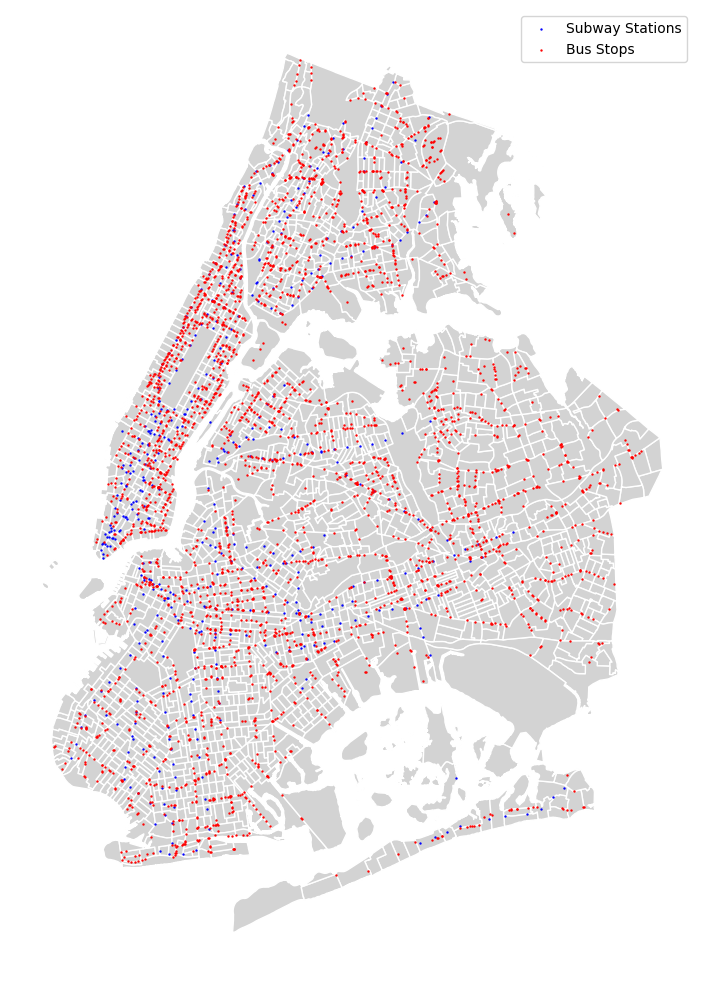

In [64]:
#plot
fig, ax = plt.subplots(figsize = (10,10))
tracts_gdf.plot(ax = ax, color = 'lightgrey', edgecolor = 'white')
subway_gdf.plot(ax = ax, markersize = .5, color = 'b', label = 'Subway Stations')
bus_gdf.plot(ax = ax, markersize = .5, color = 'r', label = 'Bus Stops')
plt.legend()
fig.patch.set_visible(False)
ax.axis('off')
plt.tight_layout()
plt.savefig('../Outputs/NYC_Bus_Subway_Stops.png')

### Creating Buffer and Calculating Accessible Tracts:

I will adapt the concepts of the '15 minute city' to calculate an appropriate buffer zone around each subway and bus stop. This aims to include any census tract that is within a reasonable and accessible distance from public transportation, within 15 minutes **on foot**.

As seen in Transform Transport's [research](https://transformtransport.org/research/livable-streets/walkability-and-the-15-minute-city-model-an-integrated-approach-for-the-city-of-milan/) and well as many other urban research, walkability not only depends on usefulness but safetly and comfort of the walking route. These additional ascpets should be taken into consideration throughout our work. It is also important to note varying levels of ability when defining measures of accessibility. While a younger resident in good health might find a public transit stop 1 mile from their resident accessible, another person of a different demographic might not.

According to [this](https://www.researchgate.net/publication/344166318_Walkability_Index_for_Elderly_Health_A_Proposal) article, an elderly community member takes approximately 13 minutes and 53s to walk 500 meters. I believe setting our buffer to roughly 500 meters should allow for most members of the community within that zone to reach the nearest station or stop within 15 minutes.

In [65]:
#add 500 ft around each shape
subway_gdf = subway_gdf.to_crs('EPSG:32118') # Use an appropriate projected system for your area
subway_gdf['buffer_distance'] = 500 # in meters
buffered_gdf = pd.DataFrame()

for index, row in subway_gdf.iterrows():
    polygon = row.geometry
    buffer_distance = row.buffer_distance
    buffered_polygon = polygon.buffer(buffer_distance, cap_style=1)
    buffered_gdf = buffered_gdf.append({'geometry': buffered_polygon}, ignore_index=True)
    
subway_buff = gpd.GeoDataFrame(buffered_gdf,crs = subway_gdf.crs)
subway_gdf = subway_gdf.to_crs('EPSG:4326') # Use an appropriate projected system for your area

In [73]:
subway_buff_full = pd.merge(subway_gdf.iloc[:,:-2],subway_buff, left_index=True, right_index=True)
subway_buff_full = gpd.GeoDataFrame(subway_buff_full,geometry = 'geometry')
subway_buff_full = subway_buff_full.to_crs('EPSG:4326')
subway_buff_full.head()

,url,objectid,name,line,notes,geometry
0,http://web.mta.info/nyct/service/,1,Astor Pl,4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...","POLYGON ((-73.98515 40.73005, -73.98518 40.729..."
1,http://web.mta.info/nyct/service/,2,Canal St,4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...","POLYGON ((-73.99428 40.71880, -73.99430 40.718..."
2,http://web.mta.info/nyct/service/,3,50th St,1-2,"1-all times, 2-nights","POLYGON ((-73.97793 40.76173, -73.97796 40.761..."
3,http://web.mta.info/nyct/service/,4,Bergen St,2-3-4,"4-nights, 3-all other times, 2-all times","POLYGON ((-73.96908 40.68086, -73.96911 40.680..."
4,http://web.mta.info/nyct/service/,5,Pennsylvania Ave,3-4,"4-nights, 3-all other times","POLYGON ((-73.88897 40.66471, -73.88900 40.664..."


In [67]:
#add 500 ft around each shape
bus_gdf = bus_gdf.to_crs('EPSG:32118') # Use an appropriate projected system for your area
bus_gdf['buffer_distance'] = 500 # in meters
buffered_gdf = pd.DataFrame()

for index, row in bus_gdf.iterrows():
    polygon = row.geometry
    buffer_distance = row.buffer_distance
    buffered_polygon = polygon.buffer(buffer_distance, cap_style=1)
    buffered_gdf = buffered_gdf.append({'geometry': buffered_polygon}, ignore_index=True)
    
bus_buff = gpd.GeoDataFrame(buffered_gdf,crs = bus_gdf.crs)
bus_gdf = bus_gdf.to_crs('EPSG:4326') # Use an appropriate projected system for your area

In [72]:
bus_buff_full = pd.merge(bus_gdf.iloc[:,:-2],bus_buff, left_index=True, right_index=True)
bus_buff_full = gpd.GeoDataFrame(bus_buff_full,geometry = 'geometry')
bus_buff_full = bus_buff_full.to_crs('EPSG:4326')
bus_buff_full.head()

,boro_code,boro_name,boro_cd,coun_dist,assem_dist,st_sen_dist,cong_dist,shelter_id,corner,on_street,cross_stre,longitude,latitude,ntaname,femafldz,femafld_t,hrc_evac,geometry
0,3,Brooklyn,317,45,42,21,9,BR02218,SW,AV D,NOSTRAND AV,-73.948745,40.640863,East Flatbush-Erasmus,X,AREA OF MINIMAL FLOOD HAZARD,5,"POLYGON ((-73.94283 40.64085, -73.94286 40.640..."
1,3,Brooklyn,310,43,46,26,11,BR02219,SW,5 AV,BAY RIDGE PKWY,-74.022837,40.629253,Bay Ridge,X,AREA OF MINIMAL FLOOD HAZARD,NaN,"POLYGON ((-74.01693 40.62925, -74.01695 40.628..."
2,3,Brooklyn,308,41,55,20,9,BR02220,SE,ST MARKS AV,BUFFALO AV,-73.924674,40.673767,Crown Heights (North),X,AREA OF MINIMAL FLOOD HAZARD,NaN,"POLYGON ((-73.91876 40.67375, -73.91879 40.673..."
3,3,Brooklyn,315,48,45,23,8,BR02221,SW,ORIENTAL BLVD,MACKENZIE ST,-73.940136,40.578042,Sheepshead Bay-Manhattan Beach-Gerritsen Beach,X,AREA OF MINIMAL FLOOD HAZARD,1,"POLYGON ((-73.93423 40.57803, -73.93426 40.577..."
4,3,Brooklyn,315,48,45,23,8,BR02222,SW,ORIENTAL BLVD,MACKENZIE ST,-73.939918,40.578065,Sheepshead Bay-Manhattan Beach-Gerritsen Beach,X,AREA OF MINIMAL FLOOD HAZARD,1,"POLYGON ((-73.93401 40.57805, -73.93404 40.577..."


In [69]:
subway_buff = subway_buff.to_crs(4326)
subway_buff.head()

,geometry
0,"POLYGON ((-73.98515 40.73005, -73.98518 40.729..."
1,"POLYGON ((-73.99428 40.71880, -73.99430 40.718..."
2,"POLYGON ((-73.97793 40.76173, -73.97796 40.761..."
3,"POLYGON ((-73.96908 40.68086, -73.96911 40.680..."
4,"POLYGON ((-73.88897 40.66471, -73.88900 40.664..."


In [70]:
bus_buff = bus_buff.to_crs(4326)
bus_buff.head()

,geometry
0,"POLYGON ((-73.94283 40.64085, -73.94286 40.640..."
1,"POLYGON ((-74.01693 40.62925, -74.01695 40.628..."
2,"POLYGON ((-73.91876 40.67375, -73.91879 40.673..."
3,"POLYGON ((-73.93423 40.57803, -73.93426 40.577..."
4,"POLYGON ((-73.93401 40.57805, -73.93404 40.577..."


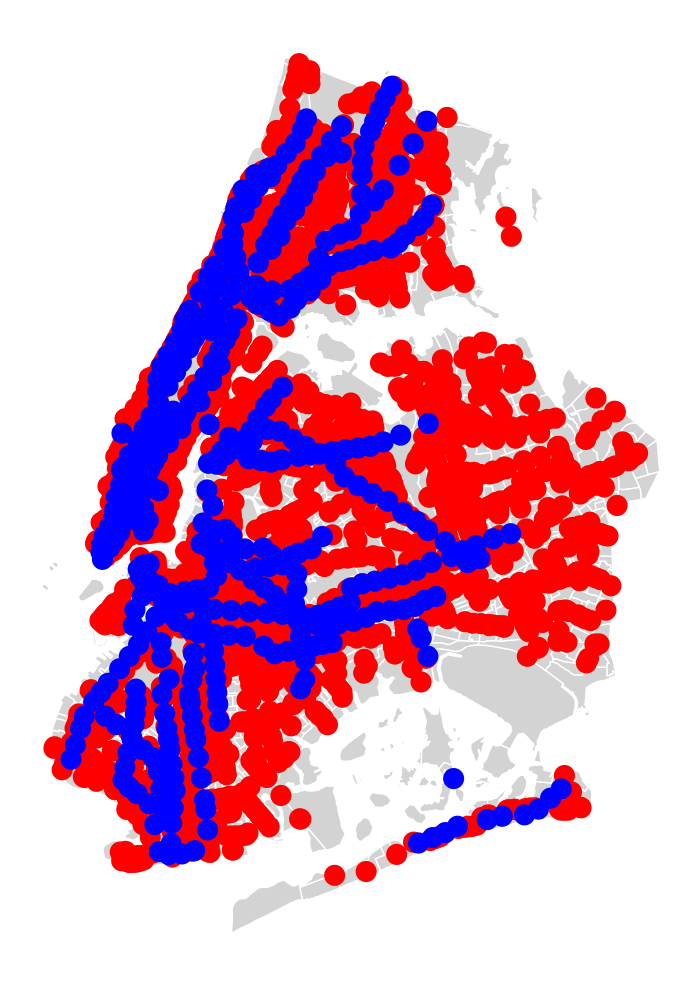

In [74]:
#plot
fig, ax = plt.subplots(figsize = (10,10))
tracts_gdf.plot(ax = ax, color = 'lightgrey', edgecolor = 'white')
bus_buff.plot(ax = ax, markersize = .5, color = 'r')
subway_buff.plot(ax = ax, markersize = .5, color = 'b')
fig.patch.set_visible(False)
ax.axis('off')
plt.tight_layout()

In [75]:
#save buffer files
bus_buff_full.to_file('../Data/bus_stop_shelter_500m_buffer.shp')
subway_buff_full.to_file('../Data/subway_stations_500m_buffer.shp')

### Calculating Accessible Census Tracts

Main Q: Which Census Tracts overlap with a bus or subway buffer zone seen above?

In [76]:
bus_buff_full.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [77]:
subway_buff_full.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [78]:
tracts_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [79]:
bus_access = gpd.sjoin(tracts_gdf,bus_buff_full, predicate = 'intersects', how = 'left')

In [80]:
subway_access = gpd.sjoin(tracts_gdf,subway_buff_full, predicate = 'intersects', how = 'left')

In [81]:
print(len(bus_access),len(subway_access))

27364 5161


In [83]:
bus_access.head()

,ctlabel,boro_code_left,boro_name_left,ct2010,boro_ct2010,cdeligibil,ntacode,ntaname_left,puma,shape_leng,...,shelter_id,corner,on_street,cross_stre,longitude,latitude,ntaname_right,femafldz,femafld_t,hrc_evac
1,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,...,MN01598,SE,1 AV,E 58 ST,-73.9624,40.7588,East Midtown-Turtle Bay,X,AREA OF MINIMAL FLOOD HAZARD,NaN
1,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,...,MN0116,SW,2 AV,E 57 ST,-73.965593,40.759155,East Midtown-Turtle Bay,X,AREA OF MINIMAL FLOOD HAZARD,NaN
1,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,...,MN01559,NE,3 AV,E 55 ST,-73.968088,40.759231,East Midtown-Turtle Bay,X,AREA OF MINIMAL FLOOD HAZARD,NaN
1,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,...,MN0118,NW,E 57 ST,2 AV,-73.965533,40.759521,East Midtown-Turtle Bay,X,AREA OF MINIMAL FLOOD HAZARD,NaN
1,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,...,MN0165,SE,E 57 ST,3 AV,-73.96717,40.759972,East Midtown-Turtle Bay,X,AREA OF MINIMAL FLOOD HAZARD,NaN


In [84]:
subway_access.head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct2010,cdeligibil,ntacode,ntaname,puma,shape_leng,shape_area,geometry,geoid,index_right,url,objectid,name,line,notes
1,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,1906016.47074,"MULTIPOLYGON (((-73.96433 40.75638, -73.96479 ...",36061009800,84.0,http://web.mta.info/nyct/service/,85,51st St,4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
1,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,1906016.47074,"MULTIPOLYGON (((-73.96433 40.75638, -73.96479 ...",36061009800,142.0,http://web.mta.info/nyct/service/,143,Lexington Ave - 53rd St,E-M,"E-all times, M-weekdays and evenings"
1,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,1906016.47074,"MULTIPOLYGON (((-73.96433 40.75638, -73.96479 ...",36061009800,48.0,http://web.mta.info/nyct/service/,49,Lexington Ave - 59th St,4-5-6-6 Express,"4,6-all times, 5-all times exc nights, 6 Expre..."
2,102,1,Manhattan,010200,1010200,I,MN17,Midtown-Midtown South,3807,5687.80243891,1860992.68163,"MULTIPOLYGON (((-73.97124 40.76094, -73.97170 ...",36061010200,84.0,http://web.mta.info/nyct/service/,85,51st St,4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
2,102,1,Manhattan,010200,1010200,I,MN17,Midtown-Midtown South,3807,5687.80243891,1860992.68163,"MULTIPOLYGON (((-73.97124 40.76094, -73.97170 ...",36061010200,142.0,http://web.mta.info/nyct/service/,143,Lexington Ave - 53rd St,E-M,"E-all times, M-weekdays and evenings"


In [85]:
tract_access = pd.DataFrame(columns = ['geoid','Bus_Access','Subway_Access','Bus_Count','Subway_Count'])
tract_access['geoid'] = tracts_gdf['geoid'].unique()

In [86]:
tract_access.head()

,geoid,Bus_Access,Subway_Access,Bus_Count,Subway_Count
0,36061009800,NaN,NaN,NaN,NaN
1,36061010200,NaN,NaN,NaN,NaN
2,36061010400,NaN,NaN,NaN,NaN
3,36061011300,NaN,NaN,NaN,NaN
4,36061013000,NaN,NaN,NaN,NaN


In [87]:
len(tract_access)

2055

In [88]:
geo_bus_dict = {}
for index, row in bus_access.iterrows():
    geoid = row.geoid
    bus_shelter = row.shelter_id
    #append to dictionary above
    if geoid not in geo_bus_dict:
        geo_bus_dict[geoid] = bus_shelter
    elif type(geo_bus_dict[geoid]) == list:
        geo_bus_dict[geoid].append(bus_shelter)
    else:
        geo_bus_dict[geoid] = [geo_bus_dict[geoid], bus_shelter]
        
#iterate through the dictionary to see which tracts have any bus stop and how many (e.g. Bus_Access and Bus_Count)
busaccess = []
buscount = []
for key,val in geo_bus_dict.items():
    #get df index for given key/geoid
    if type(val) == float and pd.isna(val):
#         print(key+' '+str(idx)+' Is Nan')
        #find column in df with key value and set to 0
        busaccess.append(0)
        buscount.append(0)
    else:
        #find column in df with key value and set to 1
        busaccess.append(1)
#         tract_access.iloc[idx]['Bus_Access'] = 1
        if type(val) == list:
            #count length and set it in the bus_count value
            count = len(val)
#             print(key+' '+str(idx)+' Is List of length '+str(count))
            buscount.append(count)
#             tract_access.iloc[idx]['Bus_Count'] = count

        else:
            #bus_count value to 1
#             print(key+' '+str(idx)+' Is 1 stop')
#             tract_access.iloc[idx]['Bus_Count'] = 1
            buscount.append(1)

In [89]:
tract_access['Bus_Access'] = busaccess
tract_access['Bus_Count'] = buscount
tract_access.head()

,geoid,Bus_Access,Subway_Access,Bus_Count,Subway_Count
0,36061009800,1,NaN,22,NaN
1,36061010200,1,NaN,25,NaN
2,36061010400,1,NaN,21,NaN
3,36061011300,1,NaN,21,NaN
4,36061013000,1,NaN,12,NaN


In [90]:
#repeat for subway
geo_subway_dict = {}
for index, row in subway_access.iterrows():
    geoid = row.geoid
    station = row.name
    #append to dictionary above
    if geoid not in geo_subway_dict:
        geo_subway_dict[geoid] = station
    elif type(geo_subway_dict[geoid]) == list:
        geo_subway_dict[geoid].append(station)
    else:
        geo_subway_dict[geoid] = [geo_subway_dict[geoid], station]
        
#iterate through the dictionary to see which tracts have any bus stop and how many (e.g. Bus_Access and Bus_Count)
access = []
count = []
for key,val in geo_subway_dict.items():
    #get df index for given key/geoid 
    if type(val) == int: #and val == np.nan:
#         print(key+' Is Nan')
        #find column in df with key value and set to 0
        access.append(0)
        count.append(0)
    else:
        #find column in df with key value and set to 1
        access.append(1)
        if type(val) == list:
            #count length and set it in the bus_count value
#             print(key+' Is List of length '+str(len(val)))
            count.append(len(val))
        else:
            #bus_count value to 1
#             print(key+' Is 1 stop')
            count.append(1)

In [91]:
tract_access['Subway_Access'] = access
tract_access['Subway_Count'] = count
tract_access.tail()

,geoid,Bus_Access,Subway_Access,Bus_Count,Subway_Count
2050,36005007300,1,1,16,4
2051,36005005100,1,1,23,5
2052,36005006300,1,1,50,11
2053,36081001900,1,1,20,9
2054,36081017100,1,1,30,16


In [92]:
tracts_transport_info = pd.merge(tracts_gdf,tract_access, on = 'geoid', how = 'left')

In [93]:
len(tracts_transport_info)

2055

In [94]:
len(tracts_gdf)

2055

In [95]:
tracts_transport_info.head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct2010,cdeligibil,ntacode,ntaname,puma,shape_leng,shape_area,geometry,geoid,Bus_Access,Subway_Access,Bus_Count,Subway_Count
0,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,1906016.47074,"MULTIPOLYGON (((-73.96433 40.75638, -73.96479 ...",36061009800,1,1,22,3
1,102,1,Manhattan,010200,1010200,I,MN17,Midtown-Midtown South,3807,5687.80243891,1860992.68163,"MULTIPOLYGON (((-73.97124 40.76094, -73.97170 ...",36061010200,1,1,25,8
2,104,1,Manhattan,010400,1010400,I,MN17,Midtown-Midtown South,3807,5693.03636707,1864600.43538,"MULTIPOLYGON (((-73.97446 40.76229, -73.97491 ...",36061010400,1,1,21,9
3,113,1,Manhattan,011300,1011300,I,MN17,Midtown-Midtown South,3807,5699.86064037,1890907.25105,"MULTIPOLYGON (((-73.98412 40.75484, -73.98460 ...",36061011300,1,1,21,14
4,130,1,Manhattan,013000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,5807.97295649,1918144.56374,"MULTIPOLYGON (((-73.96148 40.77432, -73.96194 ...",36061013000,1,1,12,2


In [96]:
tracts_transport_info.to_csv('../Data/tracts_subway_bus_access.csv')